In [1]:
from transformers import AutoModelForCausalLM,AutoTokenizer,pipeline

In [2]:
model_name="microsoft/Phi-3-mini-4k-instruct"
model=AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="cuda",
    trust_remote_code=True,
    torch_dtype="auto")

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

In [3]:
tokenizer=AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [12]:
pipe=pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=500,
    do_sample=False,
    return_full_text=False
)

In [13]:
messages=[
    {"role":"user","content":"Hello From me"}
]
print(pipe.tokenizer.apply_chat_template(messages,tokenize=False))

<|user|>
Hello From me<|end|>
<|endoftext|>


In [14]:
response=pipe(messages)[0]["generated_text"]
response

" Hello! I'm Phi, an AI developed by Microsoft. How can I help you today?"

# COT: Think Before Answering

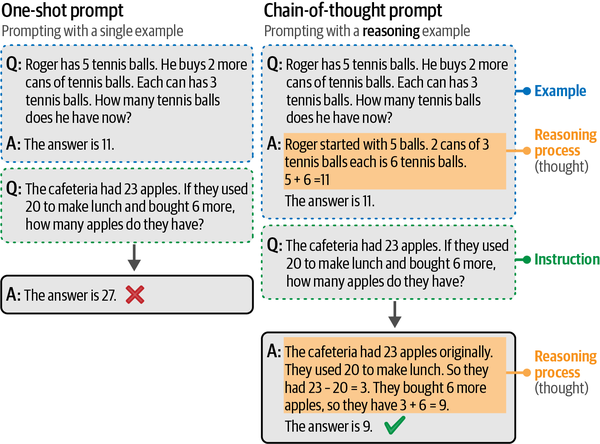

### One Shot Prompt -  COT

In [23]:
from pprint import pp
messages=[
    {"role": "user",
     "content": """Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?"""},
    {"role": "assistant",
     "content": """Roger started with 5 balls. 2 cans of 3 tennis balls each is 6 tennis balls. 5 + 6 = 11. The answer is 11."""},
    {"role": "user",
     "content": "The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have?"}
]
pp(messages)

[{'role': 'user',
  'content': 'Roger has 5 tennis balls. He buys 2 more cans of tennis balls. '
             'Each can has 3 tennis balls. How many tennis balls does he have '
             'now?'},
 {'role': 'assistant',
  'content': 'Roger started with 5 balls. 2 cans of 3 tennis balls each is 6 '
             'tennis balls. 5 + 6 = 11. The answer is 11.'},
 {'role': 'user',
  'content': 'The cafeteria had 23 apples. If they used 20 to make lunch and '
             'bought 6 more, how many apples do they have?'}]


In [24]:
response=pipe(messages)[0]["generated_text"]
pp(response)

(' The cafeteria started with 23 apples. They used 20 apples for lunch, so '
 'they had 23 - 20 = 3 apples left. After buying 6 more apples, they now have '
 '3 + 6 = 9 apples. The answer is 9.')


### Another Way in zero shot:
* add "Let's think step-by-step"

In [31]:
messages=[
    {
        "role": "user",
        "content": "The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have? let's step-by-step"
    }
]
pp(messages)

[{'role': 'user',
  'content': 'The cafeteria had 23 apples. If they used 20 to make lunch and '
             "bought 6 more, how many apples do they have? let's step-by-step"}]


In [32]:
response=pipe(messages)[0]["generated_text"]
print(response)

 To find out how many apples the cafeteria has now, we need to follow these steps:

1. Start with the initial number of apples: 23 apples.
2. Subtract the number of apples used to make lunch: 23 - 20 = 3 apples.
3. Add the number of apples bought: 3 + 6 = 9 apples.

So, the cafeteria now has 9 apples.


# Self Consistency
* This method asks the generative model the same prompt multiple times and takes the majority result as the final answer.
* each answer can be affected by different temperature and top_p values to increase the diversity of sampling.

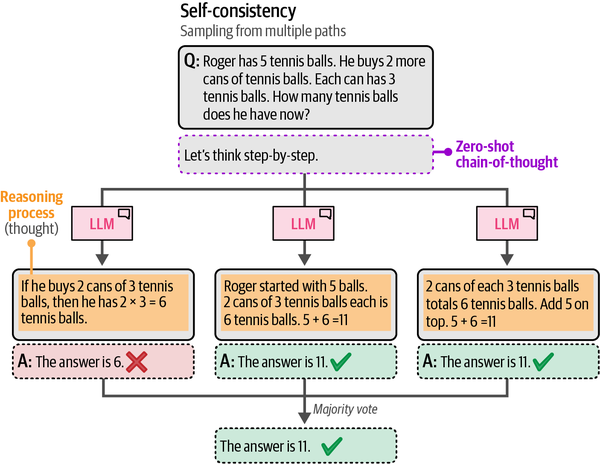

# Tree of Thought
=> https://github.com/dave1010/tree-of-thought-prompting

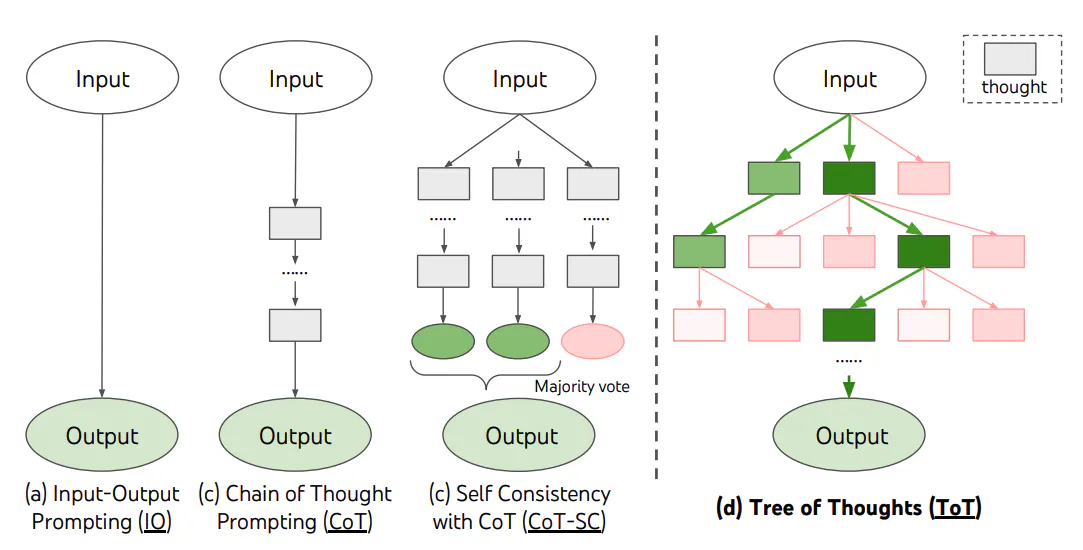

In [36]:
prompt='''Imagine three different experts are answering this question. All experts will write down 1 step of their thinking, then share it with the group. Then all experts will go on to the next step, etc. If any expert realises they're wrong at any point then they leave. The question is'''
prompt

"Imagine three different experts are answering this question. All experts will write down 1 step of their thinking, then share it with the group. Then all experts will go on to the next step, etc. If any expert realises they're wrong at any point then they leave. The question is"

In [35]:
messages=[
    {
        "role":"user",
        "content":"Bob is in the living room. He walks to the kitchen, carrying a cup. He puts a ball in the cup and carries the cup to the bedroom. He turns the cup upside down, then walks to the garden. He puts the cup down in the garden, then walks to the garage. Where is the ball?"
     }
    ]
response=pipe(
    messages
)[0]["generated_text"]
print(response)

 The ball is in the garden. When Bob turned the cup upside down in the bedroom, the ball would have fallen out. Since he then carried the empty cup to the garden and put it down, the ball would remain there.


In [40]:
messages[0]["content"]=f"{prompt} '{messages[0]['content']}' Make sure to discuss the results."
response=pipe(
    messages
)[0]["generated_text"]
print(response)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


 Expert 1:
Step 1: Bob starts in the living room with a cup.

Expert 2:
Step 1: Bob carries a cup from the living room to the kitchen.

Expert 3:
Step 1: Bob places a ball in the cup while carrying it from the living room to the kitchen.

Expert 1:
Step 2: Bob carries the cup with the ball to the bedroom.

Expert 2:
Step 2: Bob turns the cup upside down in the bedroom.

Expert 3:
Step 2: Bob places the cup with the ball in the bedroom.

Expert 1:
Step 3: Bob walks to the garden with the cup.

Expert 2:
Step 3: Bob puts the cup down in the garden.

Expert 3:
Step 3: Bob walks to the garage with the cup.

Expert 1:
Step 4: Bob leaves the cup in the garden.

Expert 2:
Step 4: Bob leaves the cup in the garden.

Expert 3:
Step 4: Bob leaves the cup in the garden.

Conclusion:
All three experts agree that the ball is in the garden.


# Output Verification
* it is important that we verify and control the output of the model to prevent breaking the application and to create a robust generative AI application.
* Open Framework to control the input and output of llm:
  - https://github.com/guardrails-ai/guardrails?tab=readme-ov-file
  - https://github.com/guidance-ai/guidance
  - https://github.com/eth-sri/lmql

In [3]:
# clean gpu memory from previous models params
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

In [5]:
!pip install llama-cpp-python --quiet

In [6]:
# using llama cpp to control output format for example json
from llama_cpp.llama import Llama

In [7]:
llm=Llama.from_pretrained(
    repo_id="microsoft/Phi-3-mini-4k-instruct-gguf",
    filename="*fp16.gguf",
    n_gpu_layers=-1,
    n_ctx=2048,
    verbose=False
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Phi-3-mini-4k-instruct-fp16.gguf:   0%|          | 0.00/7.64G [00:00<?, ?B/s]

In [ ]:
output=llm.create_chat_completion(
    messages=[
        {
            "role":"user",
            "content":"Create a warrior for an RPG in JSON Format."
         }
    ],
    response_format={"type":"json_object"},
    temperature=0
)
output